####import required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

#EDA

####Loading data

In [ ]:
true=pd.read_csv("True.csv")
fake=pd.read_csv("Fake.csv")

Columns of table

In [ ]:
true.head()

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",NaN,NaN,NaN,NaN
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",NaN,NaN,NaN,NaN
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",NaN,NaN,NaN,NaN
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",NaN,NaN,NaN,NaN
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",NaN,NaN,NaN,NaN


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Years...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obamas Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Creating a column

In [ ]:
fake['class']=0
true['class']=1

In [ ]:
fake.shape, true.shape

((23481, 5), (21417, 9))

In [ ]:
#
fake_manual_testing=fake.tail(10)
for i in range(23480, 23470, -1):
    fake.drop([i],axis = 0, inplace = True)

true_manual_testing=true.tail(10)
for i in range(21416,21406,-1):
    true.drop([i],axis = 0,inplace = True)

In [ ]:
fake.shape, true.shape

((23471, 5), (21407, 9))

In [ ]:
fake_manual_testing['class']=0
true_manual_testing['class']=1

<ipython-input-9-1396a9baab9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fake_manual_testing['class']=0
<ipython-input-9-1396a9baab9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  true_manual_testing['class']=1


In [ ]:
fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: Israel First (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied Safe Zone Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [ ]:
true_manual_testing.head(10)

,title,text,subject,date,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",NaN,NaN,NaN,NaN,1
21412,Fully committed' NATO backs new U.S. approach ...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",NaN,NaN,NaN,NaN,1


####Merging dataset

In [ ]:
data_merge = pd.concat([fake,true],axis=0)
data_merge.head(10)

,title,text,subject,date,class,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Donald Trump Sends Out Embarrassing New Years...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,NaN,NaN,NaN,NaN
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,NaN,NaN,NaN,NaN
2,Sheriff David Clarke Becomes An Internet Joke ...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,NaN,NaN,NaN,NaN
3,Trump Is So Obsessed He Even Has Obamas Name ...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,NaN,NaN,NaN,NaN
4,Pope Francis Just Called Out Donald Trump Duri...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,NaN,NaN,NaN,NaN
5,Racist Alabama Cops Brutalize Black Boy While ...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0,NaN,NaN,NaN,NaN
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0,NaN,NaN,NaN,NaN
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0,NaN,NaN,NaN,NaN
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0,NaN,NaN,NaN,NaN
9,WATCH: Brand-New Pro-Trump Ad Features So Much...,Just when you might have thought we d get a br...,News,"December 21, 2017",0,NaN,NaN,NaN,NaN


In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [ ]:
data = data_merge.drop(['title','subject','date','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'],axis=1)

In [ ]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
data.isnull().sum()

,0
text,633
class,0


In [ ]:
data.isnull().sum()

,0
text,633
class,0


In [ ]:
#Remove Null Values
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
#Random shuffling of dataset
data = data.sample(frac = 1)

In [ ]:
data.head()

,text,class
7844,There s absolutely nothing more frustrating th...,0
9826,LONDON (IFR) - The prospect of Donald Trump be...,1
16551,WELLINGTON (Reuters) - Veteran protectionist p...,1
1095,"WASHINGTON (Reuters) - Charles Schumer, the to...",1
12348,LONDON (Reuters) - Heathrow Airport announced ...,1


In [ ]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [ ]:
data.head()

,text,class
0,There s absolutely nothing more frustrating th...,0
1,LONDON (IFR) - The prospect of Donald Trump be...,1
2,WELLINGTON (Reuters) - Veteran protectionist p...,1
3,"WASHINGTON (Reuters) - Charles Schumer, the to...",1
4,LONDON (Reuters) - Heathrow Airport announced ...,1


In [ ]:
data = data.dropna(subset=['text'])

In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

Data Cleaning

In [ ]:
#process text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)
    return text

In [ ]:
data['text']=data['text'].apply(wordopt)

In [ ]:
!pip install textblob

import textblob
from textblob import TextBlob

In [ ]:
from textblob import TextBlob
def get_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    return sentiment

data['sentiment']=data['text'].apply(get_sentiment)

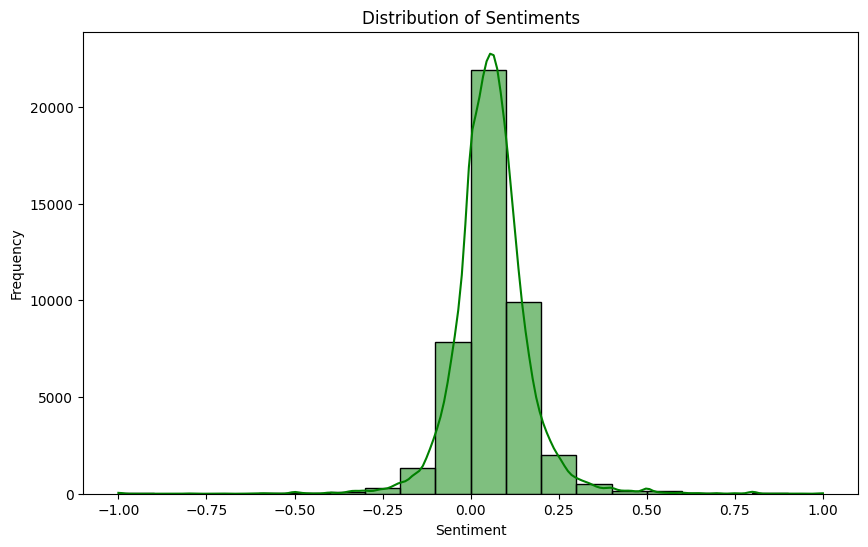

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=20, kde=True, color='green')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

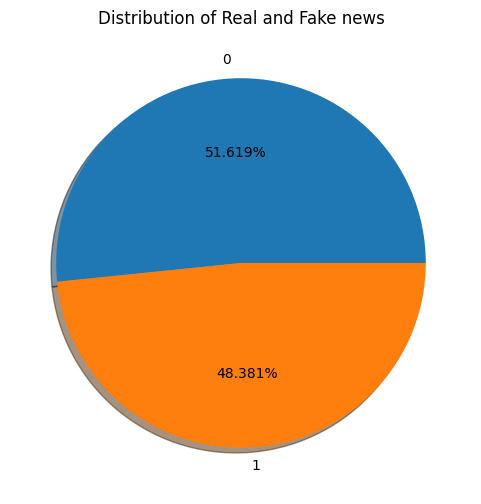

In [ ]:
label_counts = data['class'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%2.3f%%', shadow=True)
plt.title('Distribution of Real and Fake news')
plt.show()

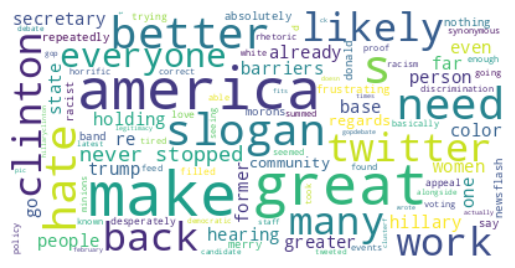

In [ ]:
text = data.text[0]

# Create and generate a word cloud image:
!pip install wordcloud
from wordcloud import WordCloud,STOPWORDS
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Model Building

In [ ]:
x=data['text']
y=data['class']

In [ ]:
x.shape

(44245,)

In [ ]:
y.shape

(44245,)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()

In [ ]:
xv_train = vectorization.fit_transform(x_train)

In [ ]:
xv_train

<33183x95073 sparse matrix of type '<class 'numpy.float64'>'
	with 6896211 stored elements in Compressed Sparse Row format>

In [ ]:
xv_test = vectorization.transform(x_test)

####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
xv_train.shape, y_train.shape
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5687
           1       0.98      0.99      0.98      5375

    accuracy                           0.98     11062
   macro avg       0.98      0.98      0.98     11062
weighted avg       0.98      0.98      0.98     11062



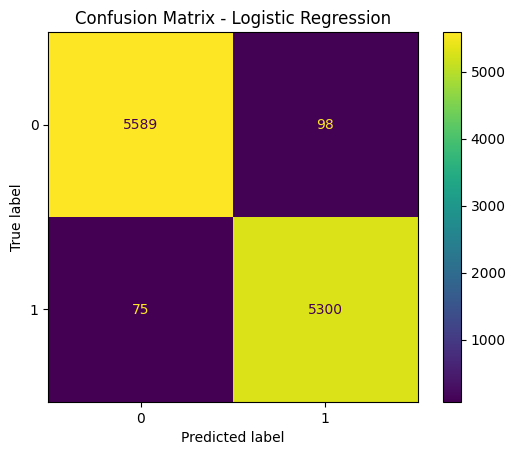

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(xv_train, y_train)
pred_dtc = DTC.predict(xv_test)
DTC.score(xv_test, y_test)
print(classification_report(y_test, pred_dtc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5687
           1       1.00      1.00      1.00      5375

    accuracy                           1.00     11062
   macro avg       1.00      1.00      1.00     11062
weighted avg       1.00      1.00      1.00     11062



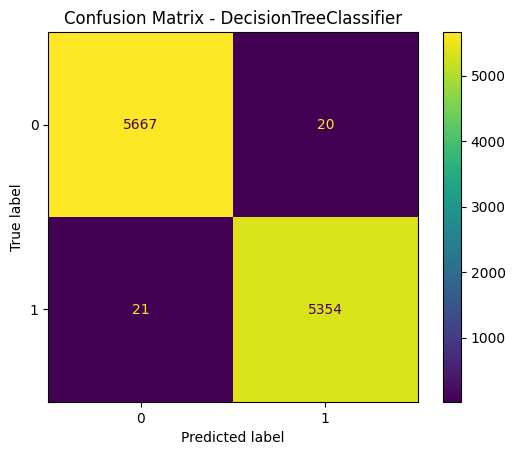

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_dtc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DTC.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix - DecisionTreeClassifier')
plt.show()

####Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
tfc = RandomForestClassifier()
tfc.fit(xv_train, y_train)
pred_rfc = tfc.predict(xv_test)
tfc.score(xv_test, y_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5687
           1       0.99      0.99      0.99      5375

    accuracy                           0.99     11062
   macro avg       0.99      0.99      0.99     11062
weighted avg       0.99      0.99      0.99     11062



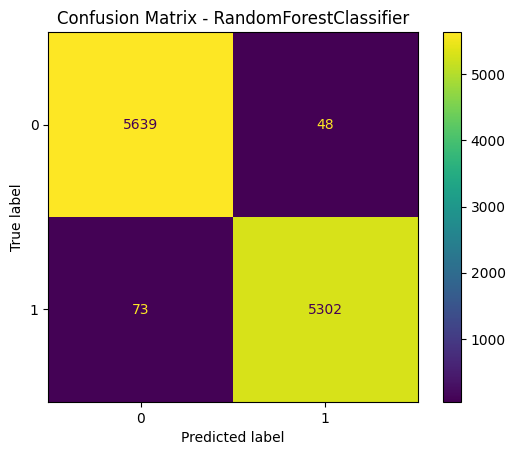

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tfc.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix - RandomForestClassifier')
plt.show()

Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC= GradientBoostingClassifier()
GBC.fit(xv_train, y_train)
gbc_pred=GBC.predict(xv_test)
GBC.score(xv_test, y_test)
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5687
           1       0.99      1.00      0.99      5375

    accuracy                           0.99     11062
   macro avg       0.99      0.99      0.99     11062
weighted avg       0.99      0.99      0.99     11062



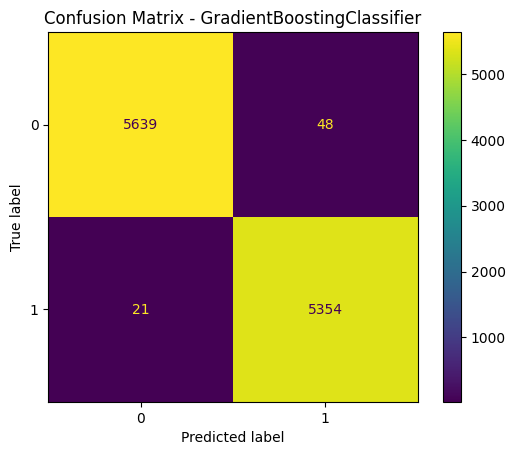

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, gbc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GBC.classes_)
disp.plot(cmap='viridis')
plt.title('Confusion Matrix - GradientBoostingClassifier')
plt.show()

In [ ]:
def output_label(n):
  if n==0:
    return "It is Fake News"
  elif n==1:
    return "It is True News"

In [ ]:
def manual_testing(news):
  testing_news = {"cleaned_text": [news]}
  new_def_test = pd.DataFrame(testing_news)
  new_def_test["cleaned_text"] = new_def_test["cleaned_text"].apply(wordopt)
  new_x_test = new_def_test["cleaned_text"]
  new_xv_test = vectorization.transform(new_x_test)
  pred_lr = LR.predict(new_xv_test)
  pred_gbc = GBC.predict(new_xv_test)
  pred_rfc = tfc.predict(new_xv_test)
  pred_dtc = DTC.predict(new_xv_test)
  return "\n\nLR Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nDTC Prediction: {}".format(output_label(pred_lr[0]),
                                              output_label(pred_gbc[0]), output_label(pred_rfc[0]), output_label(pred_dtc[0]))

In [ ]:
#news_artical = str(input())

In [ ]:
#manual_testing(news_artical)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
#Summery of results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier'],
    'Accuracy': [LR.score(xv_test, y_test), DTC.score(xv_test, y_test), tfc.score(xv_test, y_test), GBC.score(xv_test, y_test)],
    'Classification Report': [classification_report(y_test, pred_lr), classification_report(y_test, pred_dtc),
                              classification_report(y_test, pred_rfc), classification_report(y_test, gbc_pred)],
    'Confusion Matrix': [confusion_matrix(y_test, pred_lr), confusion_matrix(y_test, pred_dtc),
                         confusion_matrix(y_test, pred_rfc), confusion_matrix(y_test, gbc_pred)],
    'F1 Score': [f1_score(y_test, pred_lr), f1_score(y_test, pred_dtc), f1_score(y_test, pred_rfc), f1_score(y_test, gbc_pred)]
})

print("\Model Performance Comparison: ")
print(results)

\Model Performance Comparison: 
                          Model  Accuracy  \
0           Logistic Regression  0.984361   
1      Decision Tree Classifier  0.996294   
2      Random Forest Classifier  0.989062   
3  Gradient Boosting Classifier  0.993762   

                               Classification Report  \
0                precision    recall  f1-score   ...   
1                precision    recall  f1-score   ...   
2                precision    recall  f1-score   ...   
3                precision    recall  f1-score   ...   

           Confusion Matrix  F1 Score  
0  [[5589, 98], [75, 5300]]  0.983941  
1  [[5667, 20], [21, 5354]]  0.996186  
2  [[5639, 48], [73, 5302]]  0.988718  
3  [[5639, 48], [21, 5354]]  0.993597  


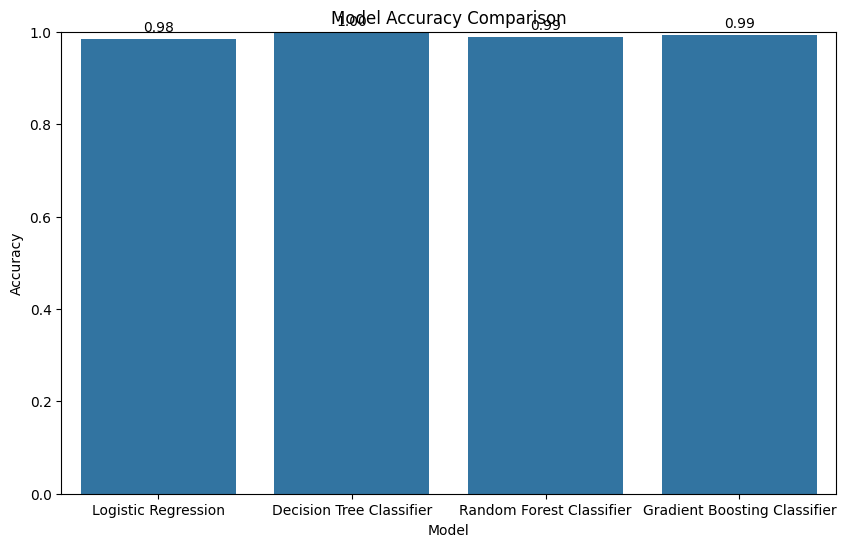

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0,1)
for i, acc in enumerate(results['Accuracy']):
    plt.text(i, acc+ 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=10)
plt.show()

In [ ]:
#Joblib can save and load machine learning models
import joblib
joblib.dump(vectorization,"vectorization.jb")
joblib.dump(GBC,"GBC.jb")

['GBC.jb']